In [1]:
#**********************************************************************
#Slide-66: Auto-SARIMA
# - Seasonal Auto Regressive Integrated Moving Average (SARIMA)
# - Auto Regressive Integrated Moving Average (ARIMA)
# - Auto Regressive Moving Average (ARMA)
#**********************************************************************

from pandas import read_csv
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from pmdarima import auto_arima
import pandas as pd


In [2]:
path = 'datasets/airline-passengers.csv'

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=956.759, Time=0.24 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=964.984, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=954.716, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=955.249, Time=0.11 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=954.299, Time=0.02 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=955.101, Time=0.10 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.26 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=956.199, Time=0.04 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=955.820, Time=0.04 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=954.627, Time=0.03 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=952.589, Time=0.13 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=953.095, Time=0.36 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=953.398, Time=0.40 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=inf, Time=0.47 sec
 ARIMA(3,1,1)(0,1,0)[12]             : AI

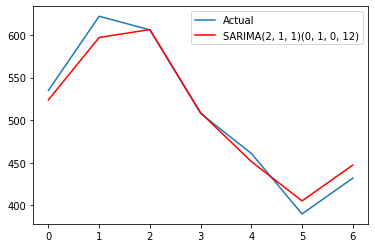

In [3]:
df = read_csv(path, header=0, parse_dates=[0], index_col=0)
train, test = df[1:len(df)-7], df[len(df)-7:]
# SARIMA with automatic hyperparameter setting
model = auto_arima(train, start_p=1, start_q=1, max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True, d=1, D=1, 
                           trace=True,  error_action='ignore',  
                            suppress_warnings=True, stepwise=True)
model.fit(train)
forecast = model.predict(n_periods=len(test))
plt.plot(test.values,label='Actual')
plt.plot(forecast, color='red',label='SARIMA'+str(model.order)+str(model.seasonal_order))
plt.legend(loc='best')
